plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- river on

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_12h_3/SalishSea_1h_20151208_20151208_grid_T.nc')
fb=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_12h_3/SalishSea_1h_20151208_20151208_ptrc_T.nc')
fkeys=fb.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)
x0,y0=np.meshgrid(lons,lats)

fm=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_full_01/mesh_mask.nc')
mesh=fm.variables['tmask'][:,:,:,:]

In [3]:
#print(fm.variables)
print(fm.variables['e3t_0'][0,:,550,170])

print(fm.variables['e3t_1d'][:])
#print(mesh)
print(fm.variables['e3t_0'])
print(fm.variables['tmask'])

[  1.00000115   1.00000501   1.00001253   1.00002718   1.0000557
   1.00011125   1.00021946   1.0004302    1.00084067   1.00164012
   1.0031971    1.00622914   1.01213271   1.02362358   1.04597551
   1.08940061   0.31185518   0.31185518   1.64636781   2.22990285
   3.29248567   5.11998508   7.97451506  11.8252972   16.10792044
  19.95870258  22.81323256  24.64073198  25.70331479  26.28684983
  26.59728865  26.75965336  26.84381704  26.88724213  26.90959407
  26.92108493  26.9269885   26.93002054  26.93157752  26.93237697]
[[  1.00000115   1.00000501   1.00001253   1.00002718   1.0000557
    1.00011125   1.00021946   1.0004302    1.00084067   1.00164012
    1.0031971    1.00622914   1.01213271   1.02362358   1.04597551
    1.08940061   1.17356428   1.33592899   1.64636781   2.22990285
    3.29248567   5.11998508   7.97451506  11.8252972   16.10792044
   19.95870258  22.81323256  24.64073198  25.70331479  26.28684983
   26.59728865  26.75965336  26.84381704  26.88724213  26.90959407
   2

In [4]:
print(fm.variables['tmask'][0,0,550,210])
print(mesh[0,0,550,210])
print(fm.variables['tmask'][0,0,0,0])
print(mesh[0,0,0,0])

1
1
0
0


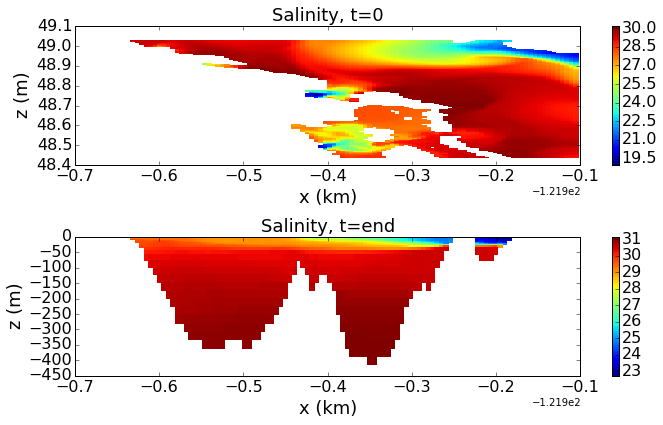

In [5]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(x0[400:550,160:270],y0[400:550,160:270],
                        np.ma.masked_where(mesh[0,0,400:550,160:270]==0,f.variables['vosaline'][-1,0,400:550,160:270]))
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -400, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx[:,160:270],zz[:,160:270],
                        np.ma.masked_where(mesh[0,:,550,160:270]==0,f.variables['vosaline'][-1,:,550,160:270]))
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -400, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

In [6]:
print(fb.variables['NO3'][-1,0,300,160:270])
print(fb.variables['NO3'][-1,35,300,160:270])

[  0.           0.           0.           0.           0.           0.           0.
   0.          19.90621948  20.44104767  20.56133842  20.45508575
  20.34071732  20.8173008   20.87552452  20.94459343  20.78828621
  20.51430321  20.31982803  20.28892517  20.24393082  20.13707542
  20.04654884  20.20277786  20.64214897  21.25460625  21.68664169
  22.09114456  22.16237068  22.26581383  22.24436188  21.83141708
  21.33694839  20.54034042  20.1363163    0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.          18.54972649
  21.38423157  22.21115685  22.06628036  21.95901299  22.00439072
  22.66794205  22.68348122  23.00401497  23.25782967  23.44768715
  23.27571487  23.09826088  23.07254791  23.12849426  23.09864426
  22.90053749  23.09591675  22.58512306  22.42161369  22.60988426
  22

<built-in method all of numpy.ndarray object at 0x7fbc62c035d0>


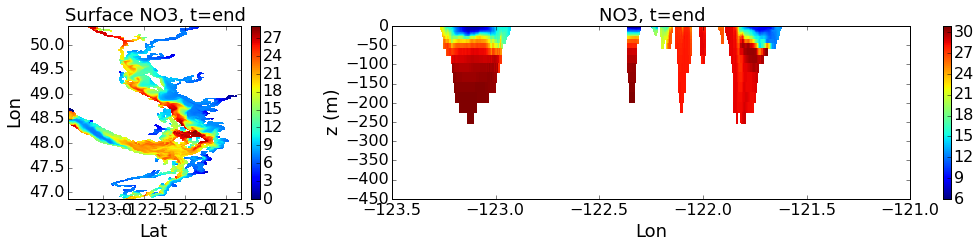

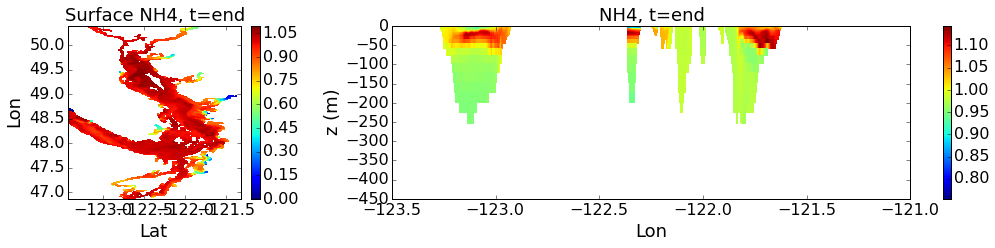

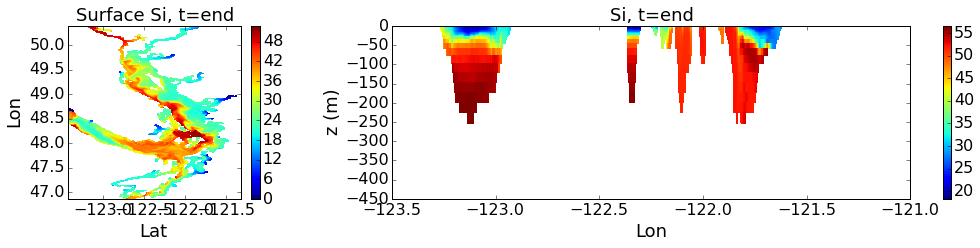

In [9]:
for ik in fkeys:
    if np.size(fb.variables[ik].shape) == 4:
        fig = plt.figure(figsize=(15,3))
        axs=fig.add_axes([.1, .1, .2, .8])
        mesh0=axs.pcolormesh(x0,y0,
                             np.ma.masked_where(mesh[0,0,:,:]==0,fb.variables[ik][-4,0,:,:]))
        cb0=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('Lon', fontsize=18)
        axs.set_xlabel('Lat', fontsize=18)
        axs.set_title('Surface ' + ik + ', t=end', fontsize=18)
        #axs.autoscale(tight='True')
        axs.axis([lons[0], lons[-1], lats[0], lats[-1]])
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        #axs.axis([-122.3, -122.0, 48, 48.3])
        
        axs1=fig.add_axes([.4, .1, .6, .8])
        mesh1=axs1.pcolormesh(xx[:,:],zz[:,:],
                              np.ma.masked_where(mesh[0,:,350,:]==0,fb.variables[ik][-4,:,350,:]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
        cb1=fig.colorbar(mesh1,ax=axs1)
        axs1.set_ylabel('z (m)', fontsize=18)
        axs1.set_xlabel('Lon', fontsize=18)
        axs1.set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs1.get_xticklabels(),fontsize=16)
        plt.setp(axs1.get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)


In [10]:
np.max(np.isnan(np.ma.masked_where(mesh[0,:,:,:]==0,fb.variables['NH4'][-1,:,:,:])))

True

In [22]:
print(fb.variables['O'][-1,5,350,50])

nan
